# Esercizio numerico

Simulare il sistema:

$
\frac{d^2 \theta}{dt^2} = - \sin(\theta) - b \frac{d \theta}{dt} + A \sin(\Omega t)
$

Riportarlo a sistema del primo ordine:
$
\begin{cases}
\frac{d y}{dt} = - \sin(\theta) - b \cdot y + A \sin(\Omega t)\\
\frac{d\theta}{dt} = y 
\end{cases}
$

Il sistema non è Hamiltoniano.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import numpy as np

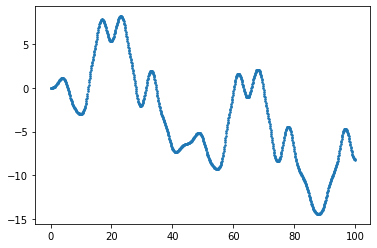

In [19]:
def step_euler(y, theta, b, A, Omega, t, dt):
    """
    Dummy stepper con il metodo di integrazione di Eulero.
    Prende in ingresso lo step attuale, 
    Restitiusce lo step successivo.
    """
    y1 = y + ( - np.sin(theta) - b * y + A * np.sin(Omega * t) ) * dt
    theta1 = theta + ( y ) * dt
    return y1, theta1

def main_euler():
    """
    Main per integrare con Eulero.
    Restitiusce il plot (da gestire esternamente con plt.show(), ad esempio).
    """
    n = 100000 # Numero di iterazioni
    t = np.linspace(0, 100, n) # Vettore temporale
    dt = t[1]-t[0] # incremento temporale
    
    # Initial Values
    y0 = 0
    theta0 = 0
    
    # Parametri del problema
    b = 0.05
    A = 0.6
    Omega = 0.7
    
    yy = np.ones(n)*y0
    theta = np.ones(n)*theta0
    for i in range(n - 1):
        yy[i+1], theta[i+1] = step_euler(yy[i], theta[i], b, A, Omega, t[i], dt)
    # ATTENZIONE QUI
    plot = plt.scatter(t[::100],      # Trucchetto: plotto un punto ogni 100
                       theta[::100],  # Trucchetto: plotto un punto ogni 100
                       s=10,          # Size del marker
                       marker='.',    # Tipo di marker
                       label='Euler') # Label per la legend
    return plot
main_euler()

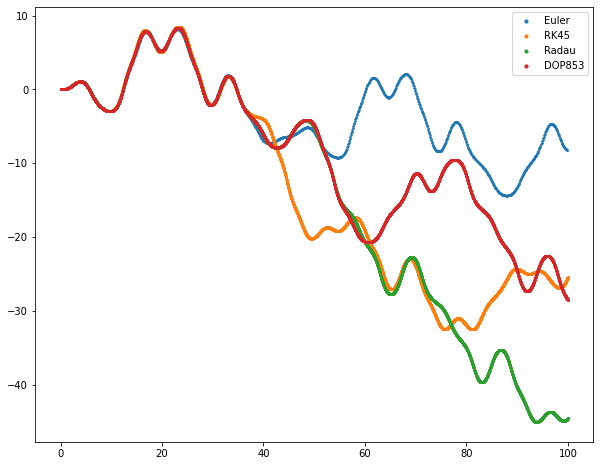

In [34]:
def motion(t, val, b, A, Omega):
    """
    Questa funzione definisce gli incrementi secondo il formato utile a 'solve_ivp' di scykit_learn.
    """
    # Dentro a val metti solo gli Initial values
    y, theta = val
    diff = [- np.sin(theta) - b * y + A * np.sin(Omega * t), # Incremento in y
            y # Incremento in theta
           ]
    return diff


def scikit_ivp_solver(t, init, b, A, Omega, my_method):
    """
    Chiamo la funzione di IVP ed return degli array con soluzione
    """
    # Chiamata al Solver:
    sol = solve_ivp(motion,            # Funzione con gli incrementi definita sopra
                    [t[0], t[-1]],     # Span di integrazione (intervallo in cui vuoi integrare), ho messo l'intero t
                    init,              # Valori iniziali 
                    t_eval=t,          # Vettore con i tempi in cui vuoi valutare il problema
                    args=[b, A, Omega],# Argomenti richiesti dall'IVP 
                    method=my_method)  # Metodo di integrazione (tipo 'RK45', 'Radau',...)
                                       # Per tutti i metodi visita --> https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
    # I risultati stanno in sol.y
    y = sol.y[0,:]     # [0,:] indica che prendo tutti i punti in posizione 0
    theta = sol.y[1,:] # [1,:] indica che prendo tutti i punti in posizione 1
    return y, theta    # Riporto i risultati

def main_scikit(my_method):
    """
    Main per integrare con il metodo my_method (da passare a solve_ivp).
    Restitiusce il plot (da gestire esternamente con plt.show(), ad esempio).
    """
    n = 1000000
    t = np.linspace(0, 100, n)
    
    # Parameters
    b = 0.05
    A = 0.6
    Omega = 0.7
    
    # Inital Values
    y0 = 0.
    theta0 = 0.
    init = [y0, theta0]
    
    # Richiamo il "gestore di integrazione"
    y, theta = scikit_ivp_solver(t, init, b, A, Omega, my_method)
    
    plot = plt.scatter(t[::100], theta[::100], s=10, marker='.', label=my_method)
    return plot

def plotter():
    """
    Plotto i vari metodi in un grafico con le stesse condizioni iniziali.
    """
    plt.figure(figsize=(10,8))
    p1 = main_euler()
    p2 = main_scikit('RK45')
    p3 = main_scikit('Radau')
    p4 = main_scikit('DOP853')
    leg = plt.legend(markerscale=2)
    for lh in leg.legendHandles: 
        lh.set_alpha(1)
    plt.show()
plotter()

In [31]:
# Try to speed up with plotly
"""
Questo blocco di codice è in più, richiede di installare plotly per girare...
"""
import plotly.graph_objects as go

def main_scikit_plotly(my_method, fig):
    n = 1000000
    t = np.linspace(0, 100, n)
    # Parameters
    b = 0.05
    A = 0.6
    Omega = 0.7
    
    # Inital Values
    y0 = 0.
    theta0 = 0.
    init = [y0, theta0]
    y, theta = scikit_ivp_solver(t, init, b, A, Omega, my_method)
    fig.add_trace(go.Scatter(x = t[::100], y = theta[::100], name=my_method))

fig = go.Figure()
main_scikit_plotly('RK45', fig)
main_scikit_plotly('Radau', fig)
fig.show()